In [40]:
import tensorflow as tf
import os

In [41]:
import cv2
import imghdr # check file extension

In [42]:
data_dir = 'data' 

In [43]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [44]:
img = cv2.imread(os.path.join('data', 'glioma_tumor', 'gg (18).jpg'))

img.shape

(512, 512, 3)

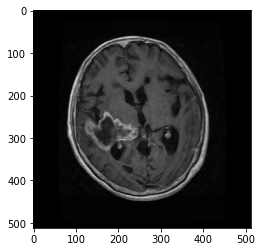

In [45]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [46]:
# removing duggy images
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)  # read image
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)  #remove duggy
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [47]:
import numpy as np
from matplotlib import pyplot as plt

In [48]:
data = tf.keras.utils.image_dataset_from_directory('data') 

Found 1221 files belonging to 2 classes.


In [49]:
batch = data.as_numpy_iterator().next()

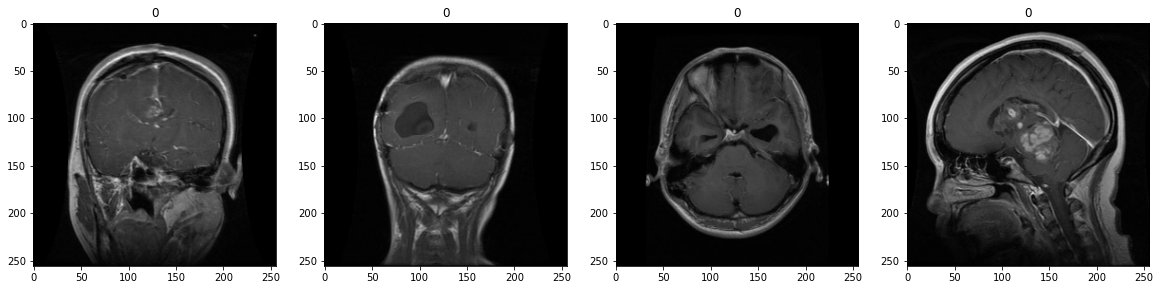

In [50]:
# to check which groupe assigned with which number  .astype(int)
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) #subplot to plot four image at the same time
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [51]:
# in tf.data you can find a lot of process that you can do on the function using pipline API. like map, shuffle
data = data.map(lambda x,y: (x/255, y))

In [52]:
train_size = int(len(data)*.7) + 2
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [53]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [55]:
model = Sequential()

In [56]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [57]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [58]:
logdir='logs'

In [59]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [60]:
hist = model.fit(train, epochs=4, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/4
29/29 [==============================] - 20s 660ms/step - loss: 0.5524 - accuracy: 0.7532 - val_loss: 0.3138 - val_accuracy: 0.8795
Epoch 2/4
29/29 [==============================] - 18s 602ms/step - loss: 0.2086 - accuracy: 0.9235 - val_loss: 0.1347 - val_accuracy: 0.9375
Epoch 3/4
29/29 [==============================] - 19s 649ms/step - loss: 0.1085 - accuracy: 0.9677 - val_loss: 0.0825 - val_accuracy: 0.9821
Epoch 4/4
29/29 [==============================] - 18s 615ms/step - loss: 0.0595 - accuracy: 0.9849 - val_loss: 0.0480 - val_accuracy: 0.9955


In [61]:
model.save(os.path.join('models','imageclassifierForbraintomurprojectDAniyalSojoudi.h5'))

In [7]:
model_new = load_model(os.path.join('models','imageclassifierForbraintomurprojectDAniyalSojoudi.h5'))

NameError: name 'load_model' is not defined

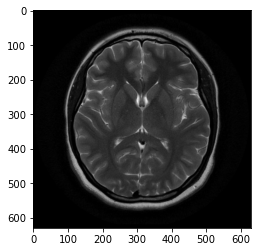

In [62]:
img = cv2.imread('C:\\Users\\Daniyel\\Imageclassification_Brain\\Data\\no_tumor\\image (26).jpg')

plt.imshow(img)


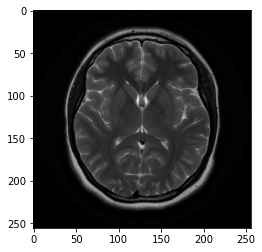

In [63]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [64]:
resize.shape

TensorShape([256, 256, 3])

In [65]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [66]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 103ms/step


In [67]:
if yhat > 0.5: 
    print(f'Predicted class has no tumor')
else:
    print(f'Predicted class has tumor')

Predicted class has no tumor


In [73]:

def classify_image(img):
    img_new = tf.image.resize(img, (256,256))
    prediction = model.predict(np.expand_dims(img_new/255, 0))
    if prediction > 0.5: 
        text = f'Predicted class has no tumor'
    else:
        text = f'Predicted class has tumor'
    return text
    
import gradio as gr    
gr.Interface(fn=classify_image, 
             inputs=gr.Image(shape=(224, 224)),
             outputs='text').launch(share=True)


Running on local URL:  http://127.0.0.1:7885
Running on public URL: https://200fd45b63ecf78a.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://www.huggingface.co/spaces


(<gradio.routes.App at 0x1b60ade7e50>,
 'http://127.0.0.1:7885/',
 'https://200fd45b63ecf78a.gradio.app')

1/1 [==============================] - 0s 39ms/step
